In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [20]:
vendasglobais = pd.read_csv('Dados/VendasGlobais.csv')
vendasglobais = vendasglobais.dropna(axis=0, how='all')
len(vendasglobais.axes[0])

2172

In [21]:
pd.DataFrame(vendasglobais.dtypes)

,0
PedidoID,float64
CategoriaID,float64
CategoriaNome,object
CategoriaDescrição,object
ClienteID,float64
ClienteNome,object
ClienteContato,object
ClienteCidade,object
ClientePaísID,object
ClientePaís,object


In [22]:
vendasglobais['Vendas Custo'].head(10)

0     417.5107
1      63.8885
2     961.5917
3    1354.1170
4    4810.2163
5    5985.2808
6     121.7160
7     298.4112
8    1005.8544
9     113.2488
Name: Vendas Custo, dtype: float64

In [23]:
vendasglobais['Margem Bruta'].head(10)

0      86.7293
1      17.1295
2     346.6963
3     488.2190
4     999.2237
5    3050.4692
6      43.8840
7     152.0888
8     208.9456
9      40.8312
Name: Margem Bruta, dtype: float64

In [24]:
vendasglobais['Vendas'].head(10)

0     504.240
1      81.018
2    1308.288
3    1842.336
4    5809.440
5    9035.750
6     165.600
7     450.500
8    1214.800
9     154.080
Name: Vendas, dtype: float64

In [25]:
vendasglobais['Desconto'].head(10)

0       0.000
1       3.858
2     218.048
3     307.056
4       0.000
5    1807.150
6      27.600
7      90.100
8       0.000
9      25.680
Name: Desconto, dtype: float64

In [26]:
vendasglobais['Frete'].head(10)

0    64.69
1    53.28
2    30.97
3    76.90
4    64.69
5    23.12
6    30.97
7    23.12
8    64.69
9    76.90
Name: Frete, dtype: float64

In [27]:
vendedores = pd.read_csv('Dados/Vendedores.csv')

In [28]:
fornecedores = pd.read_csv('Dados/Fornecedores.csv')

In [29]:
transportadoras = pd.read_csv('Dados/Transportadoras.csv')

In [30]:
planilha_total = pd.merge(vendasglobais, vendedores, on='VendedorID')
planilha_total = pd.merge(planilha_total, fornecedores, on='FornecedorID')
planilha_total = pd.merge(planilha_total, transportadoras, on='TransportadoraID')

planilha_total.head()

,PedidoID,CategoriaID,CategoriaNome,CategoriaDescrição,ClienteID,ClienteNome,ClienteContato,ClienteCidade,ClientePaísID,ClientePaís,Vendas Custo,Margem Bruta,Vendas,Desconto,Frete,Qtde,Data,VendedorID,ProdutoID,ProdutoNome,TransportadoraID,FornecedorID,VendedorNome,FornecedorNome,TransportadoraNome
0,10413.0,1.0,Men´s Clothes,Fashion for Men,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,417.5107,86.7293,504.240,0.000,64.69,24.0,20/10/2010,5.0,1.0,Lenin Jeansshorts,1.0,1.0,Stefanos Tsitsipas,USA Jeans,General Shipping
1,10500.0,2.0,Womens wear,Fashion for Women,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,63.8885,17.1295,81.018,3.858,53.28,12.0,14/04/2011,5.0,15.0,Sumi Underwear,1.0,6.0,Stefanos Tsitsipas,Surf Trip,General Shipping
2,10832.0,2.0,Womens wear,Fashion for Women,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,961.5917,346.6963,1308.288,218.048,30.97,16.0,19/11/2011,5.0,44.0,Okkaba Skin Jackets,1.0,20.0,Stefanos Tsitsipas,Wills Surfwear,General Shipping
3,10923.0,2.0,Womens wear,Fashion for Women,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,1354.1170,488.2190,1842.336,307.056,76.90,24.0,05/06/2012,4.0,67.0,X-Dress,1.0,16.0,Patrick Mcenroe,L.A. Sports,General Shipping
4,10413.0,2.0,Womens wear,Fashion for Women,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,4810.2163,999.2237,5809.440,0.000,64.69,14.0,20/10/2010,5.0,76.0,Minnki Pälsii,1.0,23.0,Stefanos Tsitsipas,Pälsii Sports,General Shipping


1783147.7005999999
ClienteNome
Grunewald           201320.4531
Th Fashing          152114.7892
Boleros             131133.1451
Champes              91362.1350
The Corner Store     82519.8235
Eintrach GS          75153.5245
Don Balón            68265.6625
Warp AG              65815.9770
Rode & Vite          59976.9277
Boombastic           50922.4655
Name: Vendas, dtype: float64


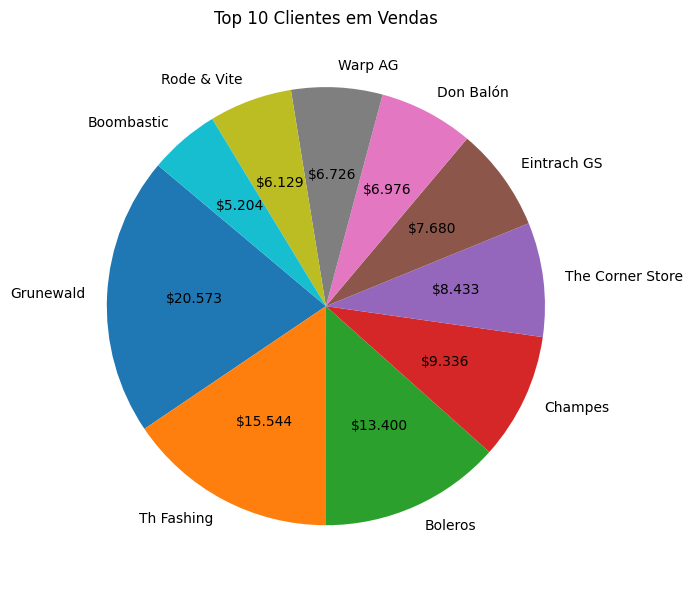

In [124]:
#1. Quem são os meus 10 maiores clientes em termos de vendas? 
vendasCliente = planilha_total.groupby('ClienteNome')['Vendas'].sum()

clientes = vendasCliente.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))

plt.pie(clientes, labels=clientes.index, autopct='$%1.3f', startangle=140)
plt.title('Top 10 Clientes em Vendas')

plt.tight_layout()
plt.show()


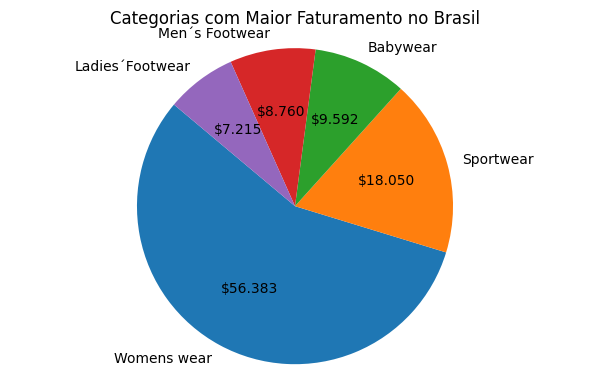

In [125]:
#3.Quais as categorias de produtos que geram maior faturamento (Vendas) no Brasil?

brasilSales = planilha_total[planilha_total['ClientePaís'] == 'Brazil']
revenueCategories = brasilSales.groupby('CategoriaNome')['Vendas'].sum()
highestCategoryRevenue = revenueCategories.sort_values(ascending=False).head(5)

plt.figure(figsize=(6,4))
plt.pie(highestCategoryRevenue, labels=highestCategoryRevenue.index, autopct='$%1.3f', startangle=140)
plt.axis('equal')
plt.title('Categorias com Maior Faturamento no Brasil')
plt.tight_layout()
plt.show()


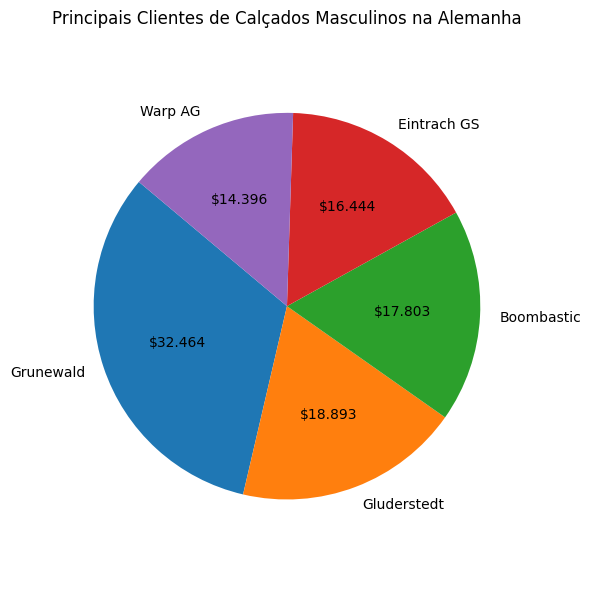

In [127]:
#5. Quais são os principais clientes (vendas $) do segmento “Calçados Masculinos”(Men ́s Footwear) na Alemanha?

germanSales = planilha_total[planilha_total['ClientePaís'] == 'Germany']
germanSalesByCategory = germanSales[germanSales['CategoriaNome'] == 'Men´s Footwear']
germanSalesByCategory = germanSalesByCategory.groupby('ClienteNome')['Vendas'].sum()
topGermanCustomers = germanSalesByCategory.sort_values(ascending=False).head(5)

plt.figure(figsize=(6,6))
plt.pie(topGermanCustomers, labels=topGermanCustomers.index, autopct='$%1.3f', startangle=140)


plt.axis('equal')
plt.title('Principais Clientes de Calçados Masculinos na Alemanha')
plt.tight_layout()
plt.show()

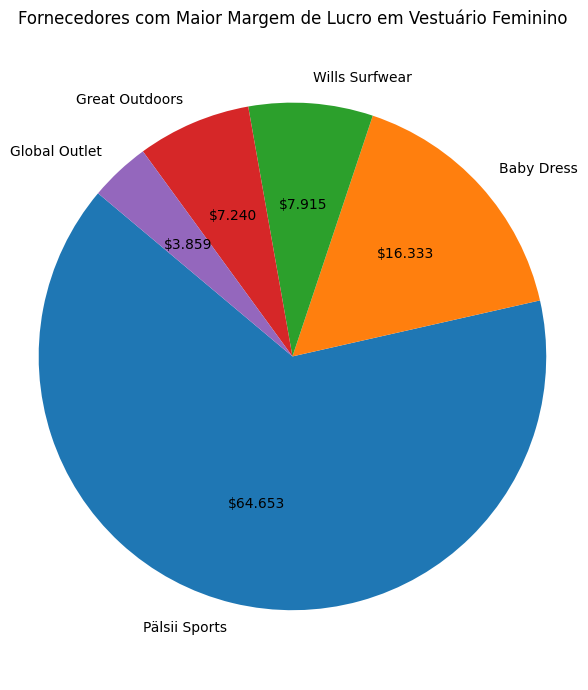

In [128]:
#7. Quais os fornecedores que dão a maior margem de lucro ($) no segmento de “Vestuário Feminino” (Womens wear)?

womensWear = planilha_total[planilha_total['CategoriaNome'] == 'Womens wear']
womensWearBySupplier = womensWear.groupby('FornecedorNome')['Margem Bruta'].sum()
highestMarginSuppliers = womensWearBySupplier.sort_values(ascending=False).head(5)

plt.figure(figsize=(6,7))
plt.pie(highestMarginSuppliers, labels=highestMarginSuppliers.index, autopct='$%1.3f', startangle=140)
plt.axis('equal')
plt.title('Fornecedores com Maior Margem de Lucro em Vestuário Feminino')
plt.tight_layout()
plt.show()

ClienteNome
Grunewald      20488.4850
Gluderstedt    11923.3485
Boombastic     11235.9700
Eintrach GS    10377.8330
Warp AG         9085.7650
Name: Vendas, dtype: float64


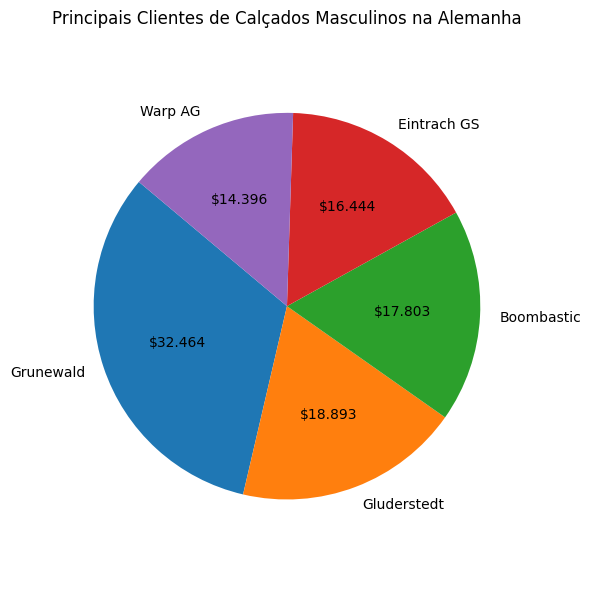

In [129]:
#9. Quais são os principais clientes (vendas $) do segmento “Calçados Masculinos” (Men ́s Footwear) na Alemanha?

germanSales = planilha_total[planilha_total['ClientePaís'] == 'Germany']
germanSalesByCategory = germanSales[germanSales['CategoriaNome'] == 'Men´s Footwear'] 
germanSalesByCategory = germanSalesByCategory.groupby('ClienteNome')['Vendas'].sum()
topGermanCustomers = germanSalesByCategory.sort_values(ascending=False).head(5)
print(topGermanCustomers)

plt.figure(figsize=(6,6))

# plt.pie(topGermanCustomers, labels=topGermanCustomers.index, autopct='%1.1f%%', startangle=140)
plt.pie(topGermanCustomers, labels=topGermanCustomers.index, autopct='$%1.3f', startangle=140)

plt.axis('equal')
plt.title('Principais Clientes de Calçados Masculinos na Alemanha')
plt.tight_layout()
plt.show()

ClientePaís
Germany    14093.0
USA         6689.0
UK          4176.0
Ireland     3871.0
France      3619.0
Name: Qtde, dtype: float64


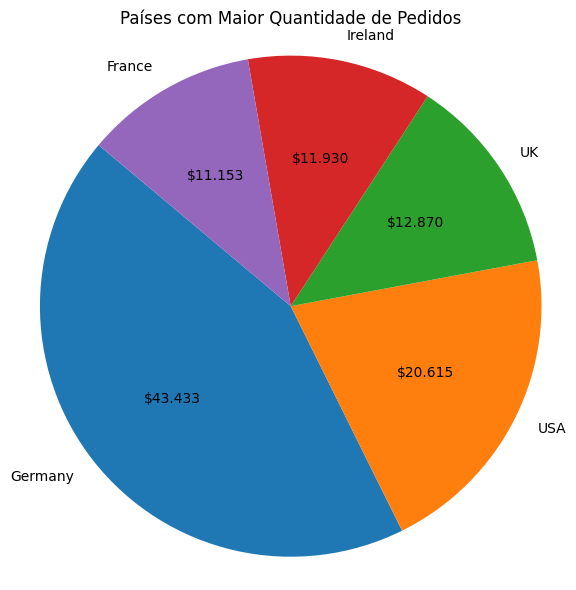

In [131]:
#10. Quais os países nos quais mais se tiram pedidos (qtde total de pedidos)?

totalOrdersByCountry = planilha_total.groupby('ClientePaís')['Qtde'].sum()
topCountriesByOrders = totalOrdersByCountry.sort_values(ascending=False).head(5)
print(topCountriesByOrders)

plt.figure(figsize=(6,6))

plt.pie(topCountriesByOrders, labels=topCountriesByOrders.index, autopct='$%1.3f',startangle=140)

plt.axis('equal')
plt.title('Países com Maior Quantidade de Pedidos')
plt.tight_layout()
plt.show()
